#### Carregar as imagens e transformá-las em uma matriz Numpy

In [3]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('RGB')  # Ensures image is in RGB mode
            img = img.resize(target_size)  # Resizing to a fixed size
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
    return images, labels

# Paths to folders
normal_folder = r'dataset\normal'
covid_folder = r'dataset\covid'

# Load images and their respective labels
normal_images, normal_labels = load_images_from_folder(normal_folder, label=False)
covid_images, covid_labels = load_images_from_folder(covid_folder, label=True)

# Combine datasets
images = np.array(normal_images + covid_images)
labels = np.array(normal_labels + covid_labels)

# Shuffle dataset
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# Save dataset to .npy file
np.save('images.npy', images)
np.save('labels.npy', labels)

print("Dataset saved successfully!")

Dataset saved successfully!


#### Testar se as imagens foram salvas com sucesso e como elas se parecem

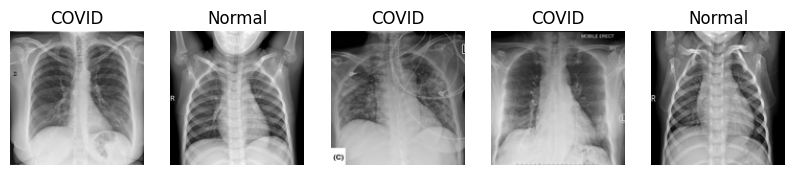

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
images = np.load('images.npy')
labels = np.load('labels.npy')

# Function to display images with their labels
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        j = np.random.randint(0, images.shape[0])
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[j])
        label = 'COVID' if labels[j] else 'Normal'
        plt.title(label)
        plt.axis('off')  # Hide axes
    plt.show()

# Render a few images
display_images(images, labels, num_images=5)

#### Modelo Do Grupo

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the dataset
images = np.load('images.npy')
labels = np.load('labels.npy')

# Normalize the images (each color channel is between 0 and 255, so just divide by 255)
images = images.astype('float32') / 255.0

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(1, activation='sigmoid'))  

# Compilando:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Treino:
history = model.fit(
    X_train,
    y_train,
    epochs=50, 
    validation_data=(X_val, y_val)
)

test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Test Accuracy: {test_acc}')

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.4859 - loss: 0.7446 - val_accuracy: 0.6316 - val_loss: 0.6913
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7823 - loss: 0.5058 - val_accuracy: 0.6316 - val_loss: 0.5825
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.7550 - loss: 0.4846 - val_accuracy: 0.6316 - val_loss: 0.5258
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.8212 - loss: 0.3581 - val_accuracy: 0.8421 - val_loss: 0.3198
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9605 - loss: 0.2178 - val_accuracy: 0.7368 - val_loss: 0.4491
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8931 - loss: 0.2327 - val_accuracy: 0.9474 - val_loss: 0.1645
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.9616 - loss: 0.1571 - val_accuracy: 0.9474 - val_loss: 0.1196
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9933 - loss: 0.0547 - val_accuracy: 0.8947 - val_loss:

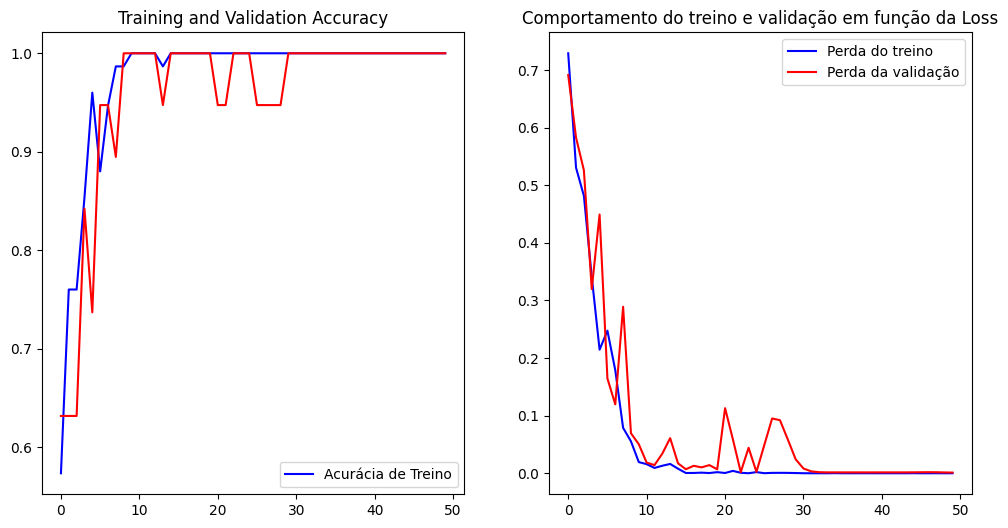

In [35]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Acurácia de Treino')
plt.plot(epochs, val_acc, 'r')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Perda do treino')
plt.plot(epochs, val_loss, 'r', label='Perda da validação')
plt.title('Comportamento do treino e validação em função da Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


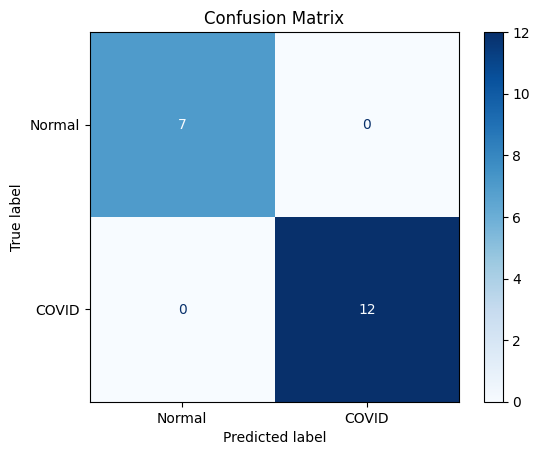

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained the model and have the validation set (X_val, y_val)
# Predict the labels for the validation set
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary labels (True/False)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'COVID'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Call the function to plot
plot_confusion_matrix(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


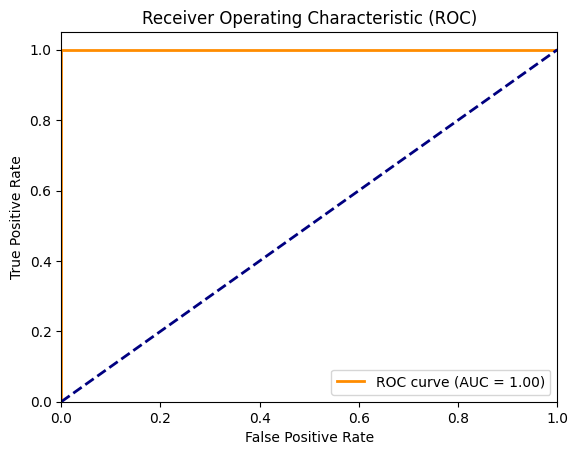

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained the model and have the validation set (X_val, y_val)
# Predict the probabilities for the validation set
y_pred_probs = model.predict(X_val)

# Compute the ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot
plot_roc_curve(fpr, tpr, roc_auc)


In [39]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, y_pred)
print(f'Precision: {precision:.4f}')

from sklearn.metrics import recall_score
recall = recall_score(y_val, y_pred)
print(f'Recall: {recall:.4f}')

from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_pred)
print(f'F1 Score: {f1:.4f}')



Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
